<a href="https://colab.research.google.com/gist/qbeer/545fa2d88e7541f81a137f6d0363e6c9/hw7_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import *
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve

## 1.) Linear SVC in case of linear separation

* load the Iris dataset (can be found in sklearn API)
* scale the data and plot the petal length vs petal width in a scatterplot colored with the target
* train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
* visualize the model's decision boundary and the margins based on the coefficients learnt by the model
* interpret the results, what is the role of the C hyperparameter?

In [2]:
#!pip install --upgrade scikit-learn for the as_frame argument

In [3]:
data = load_iris(as_frame=True, return_X_y=False)

In [4]:
data.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Width (cm)')

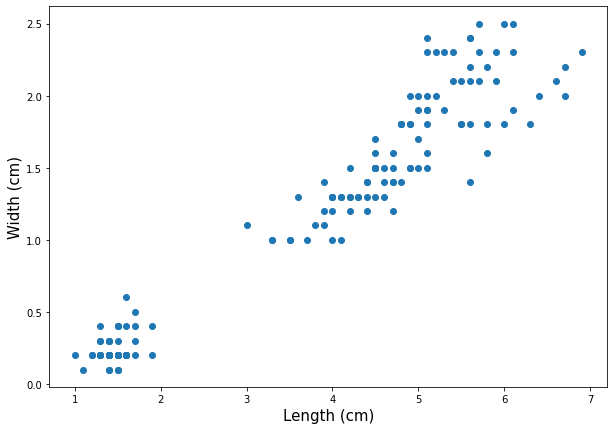

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(data.data['petal length (cm)'], data.data['petal width (cm)'])
plt.xlabel('Length (cm)', fontsize=15)
plt.ylabel('Width (cm)', fontsize=15)

In [6]:
data.data.columns = ['0','1','2','3']

In [7]:
data.data = pd.DataFrame(StandardScaler().fit_transform(data['data']),columns=data['data'].columns)

In [8]:
data.data.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [9]:
data.target.tail()

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int64

https://stackoverflow.com/questions/23794277/extract-decision-boundary-with-scikit-learn-linear-svm

In [10]:
linSVM_1 = SVC(C=1.0,kernel='linear')
linSVM_1000 = SVC(C=1000.0,kernel='linear')

In [11]:
# 2 and 3 columns are petal length and width.
linSVM_1.fit(data.data.values[:,2:4], data.target)
linSVM_1000.fit(data.data.values[:,2:4], data.target)

SVC(C=1000.0, kernel='linear')

In [12]:
def plotBoundaries(data, target, model, z_val, column_1, column_2):
    plt.scatter(data[:,column_1],data[:,column_2],c=target)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy)
    # plot decision boundary and margins
    if (z_val==-1):
        ax.contour(
            XX, YY, Z.reshape(XX.shape), colors="k", levels=[-1, 0, 1], alpha=0.7, linestyles=["--", "-", "--"]
        )
    else:
        ax.contour(
            XX, YY, Z[:,z_val].reshape(XX.shape), colors="k", levels=[-1, 0, 1], alpha=0.7, linestyles=["--", "-", "--"]
        )
    
    

    # plot support vectors
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

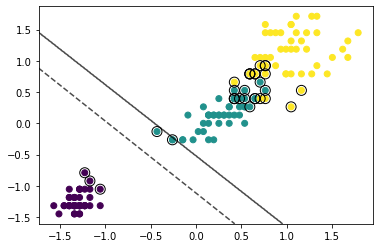

/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


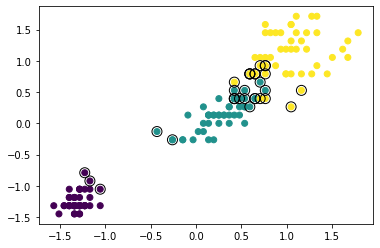

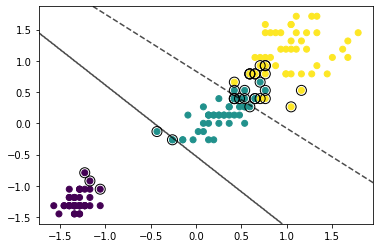

In [13]:
plotBoundaries(data=data['data'].values, target=data['target'], model=linSVM_1,z_val=0, column_1=2, column_2=3)
plotBoundaries(data=data['data'].values, target=data['target'], model=linSVM_1,z_val=1, column_1=2, column_2=3)
plotBoundaries(data=data['data'].values, target=data['target'], model=linSVM_1,z_val=2, column_1=2, column_2=3)

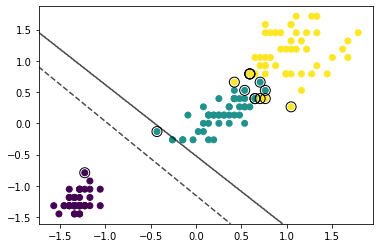

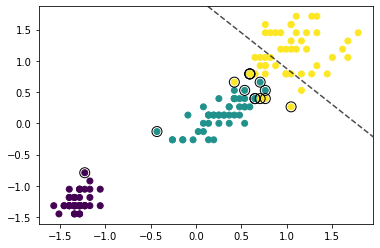

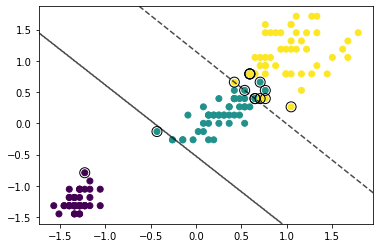

In [14]:
plotBoundaries(data=data['data'].values, target=data['target'], model=linSVM_1000,z_val=0, column_1=2, column_2=3)
plotBoundaries(data=data['data'].values, target=data['target'], model=linSVM_1000,z_val=1, column_1=2, column_2=3)
plotBoundaries(data=data['data'].values, target=data['target'], model=linSVM_1000,z_val=2, column_1=2, column_2=3)

From SKLearn page: "Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty." So as we increase C we decrease the regularization, this is visible on the plots above as well. C=1000 is much less strict, a kind of 'ghost' border appears as well.

## 2.) Linear SVC but non-linear separation

* create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
* perform the same steps just as in the previous exercise and use the linear kernel for the SVC
* since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
* write down with your own words in few sentences how the support vector machine works

In [15]:
X, y = make_moons(noise=0.1, random_state=0)

Text(0, 0.5, 'Y')

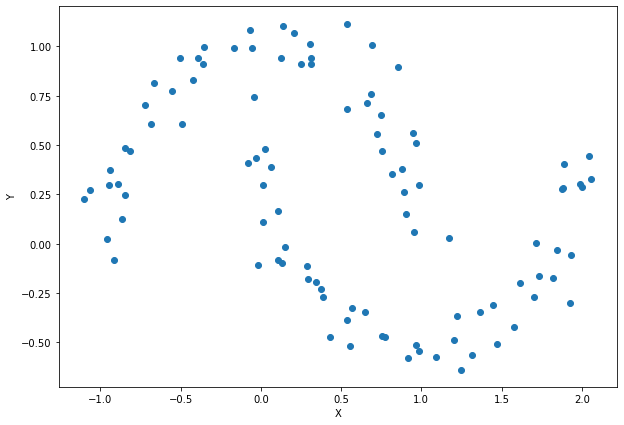

In [16]:
plt.figure(figsize=(10,7))
plt.plot(X[:,0],X[:,1],'o')
plt.xlabel('X')
plt.ylabel('Y')

#### Let's look at linear

In [17]:
linSVM_1 = SVC(C=1.0,kernel='linear')
linSVM_1000 = SVC(C=1000.0,kernel='linear')

In [18]:
linSVM_1.fit(X,y)
linSVM_1000.fit(X,y)

SVC(C=1000.0, kernel='linear')

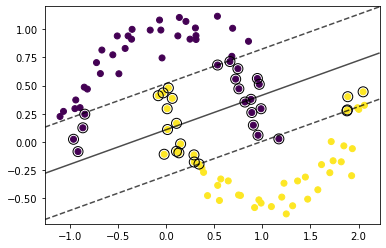

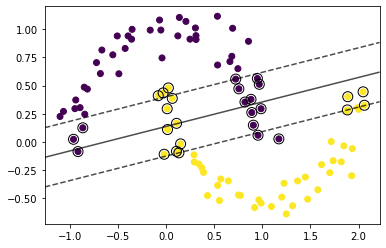

In [19]:
plotBoundaries(data=X, target=y, model=linSVM_1,z_val=-1, column_1=0, column_2=1)
plotBoundaries(data=X, target=y, model=linSVM_1000,z_val=-1, column_1=0, column_2=1)

#### Let's try now $3^{rd}$ Polynomial:

In [20]:
polySVM_1 = SVC(C=1.0,kernel='poly',degree=3)
polySVM_1000 = SVC(C=1000.0,kernel='poly',degree=3)

In [21]:
polySVM_1.fit(X,y)
polySVM_1000.fit(X,y)

SVC(C=1000.0, kernel='poly')

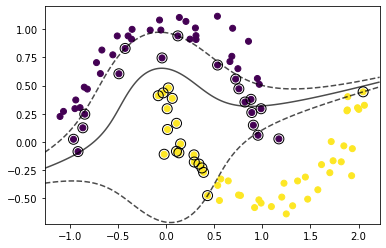

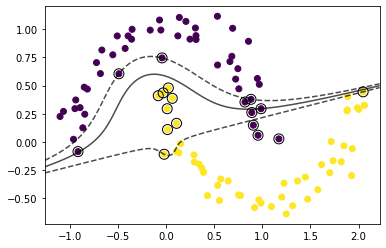

In [22]:
plotBoundaries(data=X, target=y, model=polySVM_1,z_val=-1, column_1=0, column_2=1)
plotBoundaries(data=X, target=y, model=polySVM_1000,z_val=-1, column_1=0, column_2=1)

#### Let's try now Radial Basis Function:

In [23]:
rbfSVM_1 = SVC(C=1.0)
rbfSVM_1000 = SVC(C=1000.0)

In [24]:
rbfSVM_1.fit(X,y)
rbfSVM_1000.fit(X,y)

SVC(C=1000.0)

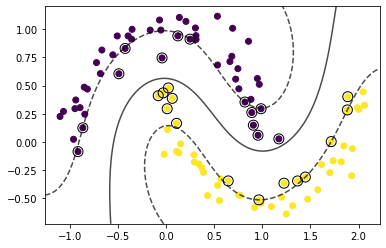

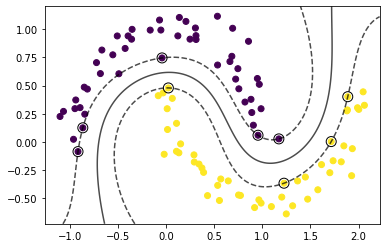

In [25]:
plotBoundaries(data=X, target=y, model=rbfSVM_1,z_val=-1, column_1=0, column_2=1)
plotBoundaries(data=X, target=y, model=rbfSVM_1000,z_val=-1, column_1=0, column_2=1)

SVM in short constructs a hyperplane which then can be used for classification of the points. It tries to be in the middle of the two closest points of the sets. Linear solution can be good for some problems, but usually data is not that simple.

## 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

Reminder:

* you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels

* train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)

* generate prediction for the samples that were not used during the training

To-do now:

* build default SVC, but set it to predict probabilities
* plot the ROC curve and calculate the confusion matrix for the predictions
* do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure)
*how good is the performance of the new model?

### Preparation

In [26]:
def value_integerizer(dataframe, column):
    col_name, _ = np.unique(dataframe[column].astype(str),return_counts=True)
    dataframe[column] = dataframe[column].replace(to_replace=col_name, value=([x+1 for x in range(len(col_name))]))
    print(col_name)
    return dataframe

In [27]:
orig_df = pd.read_excel('aar3247_cohen_sm_tables-s1-s11.xlsx', sheet_name=5,skiprows=2)
df = orig_df.copy()

In [28]:
df['AJCC Stage'] = orig_df['AJCC Stage'].replace(to_replace=np.NaN, value=0)
df = value_integerizer(df,'Tumor type')
df = value_integerizer(df,'AJCC Stage')
df_full = df.copy()
df = df.dropna().reset_index(drop=True)
df_dropped = df.copy()
df = df.drop(df.columns[0:2],axis=1)
df = df.drop(df.columns[-1],axis=1)
df = df.drop(df.columns[-1],axis=1)
df.info()
for col in df.columns:
    if df[col].dtypes == 'object': #if the column contains string as well
        df[col] = df[col].replace(to_replace='^\D+', #remove the * or any non digit and cast to float
                                  value='',
                                  regex=True).astype(dtype=float)

tumor_types = ['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Normal', 'Ovary','Pancreas', 'Stomach']

['Breast' 'Colorectum' 'Esophagus' 'Liver' 'Lung' 'Normal' 'Ovary'
 'Pancreas' 'Stomach' 'nan']
['0' 'I' 'II' 'III']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tumor type                   1803 non-null   float64
 1   AJCC Stage                   1803 non-null   int64  
 2   AFP (pg/ml)                  1803 non-null   object 
 3   Angiopoietin-2 (pg/ml)       1803 non-null   object 
 4   AXL (pg/ml)                  1803 non-null   float64
 5   CA-125 (U/ml)                1803 non-null   object 
 6   CA 15-3 (U/ml)               1803 non-null   object 
 7   CA19-9 (U/ml)                1803 non-null   object 
 8   CD44 (ng/ml)                 1803 non-null   object 
 9   CEA (pg/ml)                  1803 non-null   object 
 10  CYFRA 21-1 (pg/ml)           1803 non-null   object 
 11  DKK1 (ng/ml)     

In [29]:
df_2 = df.copy()
col_name, _ = np.unique(df['Tumor type'].astype(str),return_counts=True)
df_2['Tumor type'] = df['Tumor type'].replace(to_replace=col_name, value=([x+1 for x in range(len(col_name))]))
df_2['Tumor type'][df['Tumor type'] != 6.0] = 1
df_2['Tumor type'][df['Tumor type'] == 6.0] = 0

/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Fit and so on

In [30]:
#How many tumor and normal data we have
df_2['Tumor type'].value_counts()
X = df_2[df_2.columns[2:]]
X_train = X[::2]
X_test = X[1::2]

y = df_2[df_2.columns[0]]
y_train = y[::2]
y_test = y[1::2]
CancerSVM_1 = SVC(C=1.0,probability=True)
CancerSVM_1.fit(X_train,y_train)

SVC(probability=True)

In [32]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

# Compute ROC curve and ROC area
fpr = dict()
tpr = dict()
fpr, tpr, _ = metrics.roc_curve(y_test, CancerSVM_1.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)

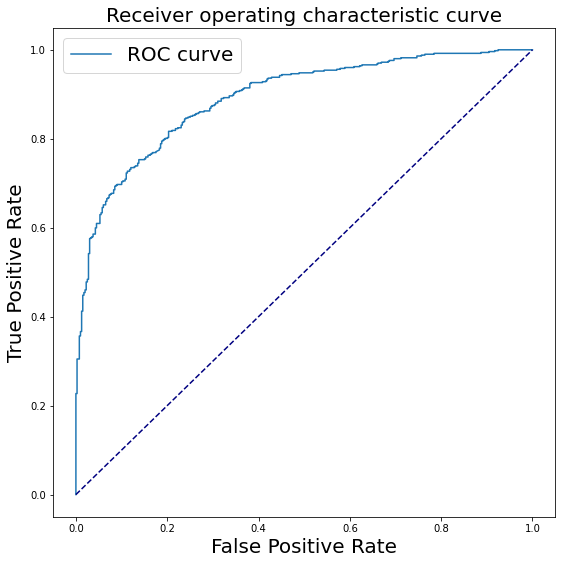

In [33]:
plt.figure(figsize=(9,9))
plt.plot(fpr,tpr,label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic curve',fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [34]:
ypred1 = CancerSVM_1.predict(X_test)

In [35]:
cm = metrics.confusion_matrix(y_test, ypred1)

Text(0.5, 103.73999999999997, 'Predicted')

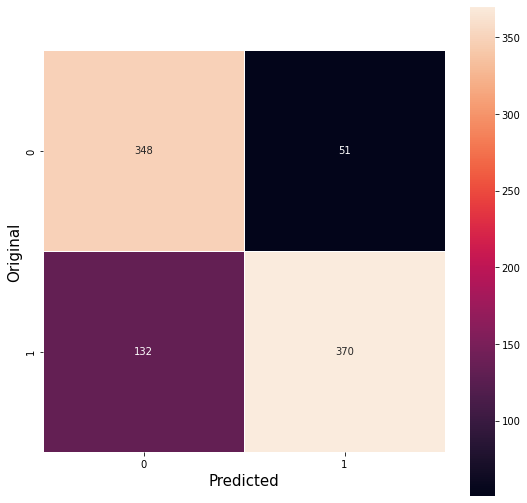

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, 
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True)
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

### Get the score and results

In [37]:
y_cs_score = df_dropped[df_dropped.columns[-2]].values

In [38]:
# Compute ROC curve and ROC area
fpr_cs = dict()
tpr_cs = dict()
fpr_cs, tpr_cs, _ = metrics.roc_curve(y, y_cs_score)

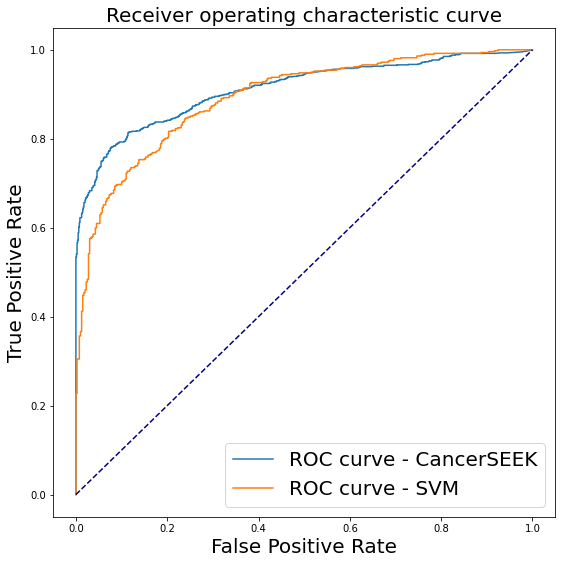

In [39]:
plt.figure(figsize=(9,9))
plt.plot(fpr_cs,tpr_cs,label='ROC curve - CancerSEEK')
plt.plot(fpr,tpr,label='ROC curve - SVM')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic curve',fontsize=20)
plt.legend(fontsize=20)
plt.show()

CancerSEEK seems to be still better. New model seems to be OK, although I have many false negatives which can be dangerous

## 4.) Scale data and try different kernels

* scale your data before applying the SVC model
* plot the ROC curve and calculate the confusion matrix for the predictions
* does your model perform better or worse after scaling?
* try out other kernels (linear, poly) and evaluate the performance of the model the same way

In [40]:
tumorX = StandardScaler().fit_transform(X)

In [41]:
X_train_scaled = tumorX[::2]
X_test_scaled = tumorX[1::2]

In [42]:
def cancerSVM(kernel):
    CancerSVM_1 = SVC(C=1.0,probability=True,kernel=kernel)
    CancerSVM_1.fit(X_train_scaled,y_train)

    #https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
    y_score_scaled = CancerSVM_1.predict_proba(X_test_scaled) #confidence score

    # Compute ROC curve and ROC area
    fpr_scaled = dict()
    tpr_scaled = dict()
    fpr_scaled, tpr_scaled, _ = metrics.roc_curve(y_test, y_score_scaled[:,1])
    plt.figure(figsize=(9,9))
    plt.plot(fpr_scaled,tpr_scaled,label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)
    plt.title('Receiver operating characteristic curve',fontsize=20)
    plt.legend(fontsize=20)
    plt.show()
    ypred1_scaled = CancerSVM_1.predict(X_test_scaled)
    cm_scaled = metrics.confusion_matrix(y_test, ypred1_scaled)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm_scaled, 
                annot=True,
                fmt="d",
                linewidths=.5,
                square = True)
    plt.ylabel('Original',fontsize=15)
    plt.xlabel('Predicted',fontsize=15)
    return -1

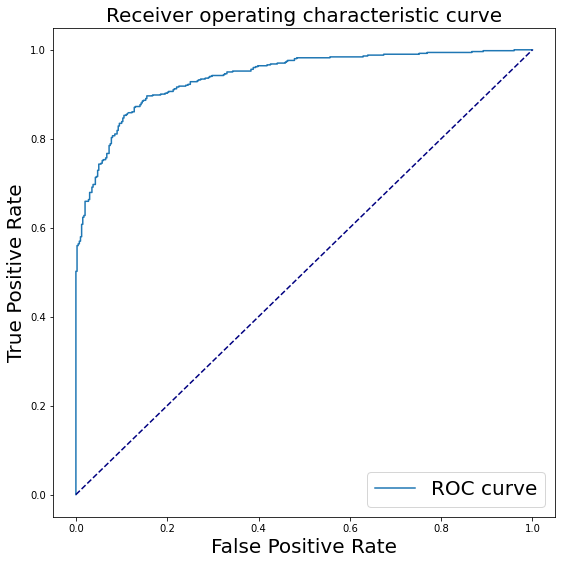

-1

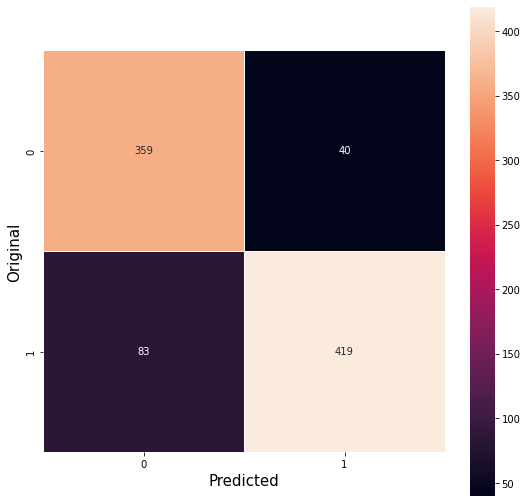

In [43]:
cancerSVM('rbf')

Performs way better than the non-scaled version, uncanny!

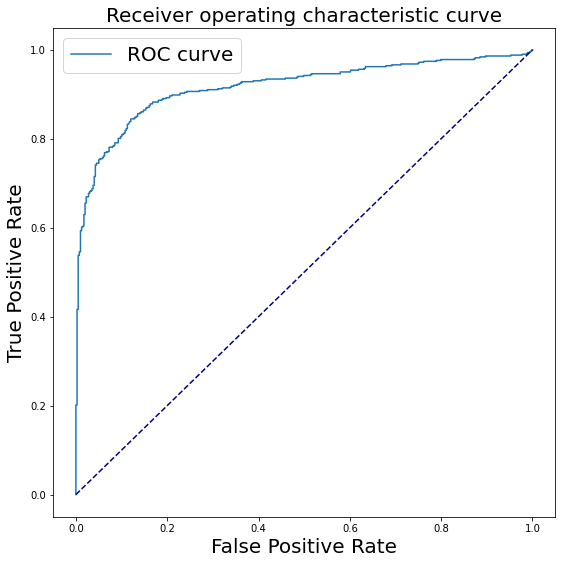

-1

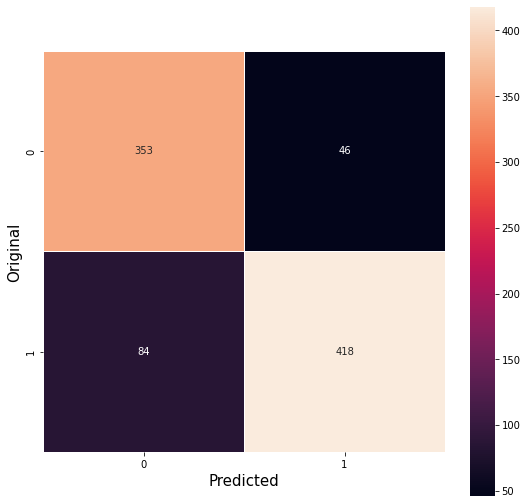

In [44]:
cancerSVM('linear')

Very similar to RBF

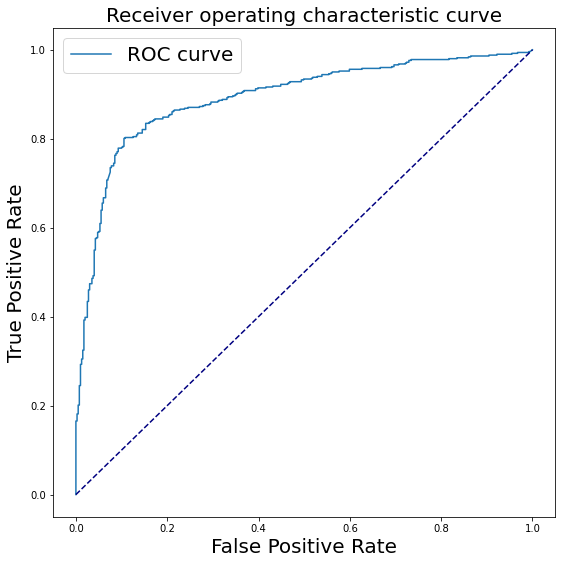

-1

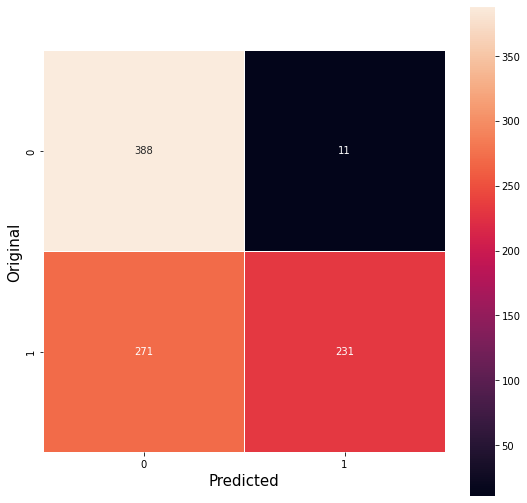

In [45]:
cancerSVM('poly')

$3^{rd}$ degree poly seems to be worse than the rest?

## 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

* prepare data as described in the title, then scale all inputs based on the training set
* select your best performing SVC model from the previous exercise
* check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
* create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
* select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)